Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Resumo das Medidas:
                   Média     Mediana       Moda  Desvio Padrão     Variância  \
Total       1234.225990  105.000510   2.096309    4662.961510  2.174321e+07   
Coal         481.993813   32.006230   3.292800    1915.234009  3.668121e+06   
Oil          449.778470   37.340292   1.732235    1669.287005  2.786519e+06   
Gas          242.844515   20.427941   0.000215     883.838008  7.811696e+05   
Cement        36.687228    2.430426   0.006337     178.720280  3.194094e+04   
Flaring       12.292344    0.558887  17.505000      50.934177  2.594290e+03   
Other         10.629620    1.248126   6.392000      40.454423  1.636560e+03   
Per Capita     9.063704    8.124453   1.078176       4.780221  2.285051e+01   

              Mínimo        Máximo  25 Percento  50 Percento (Mediana)  \
Total       2.096309  37123.850352    43.342000             105.

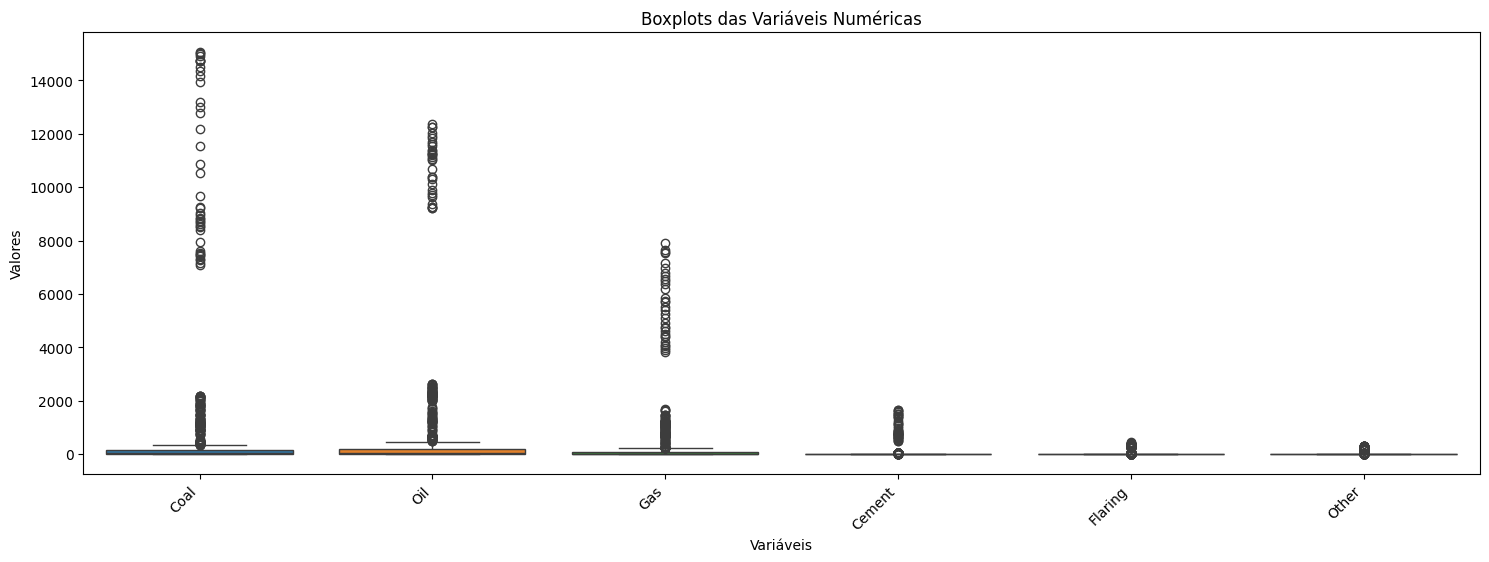

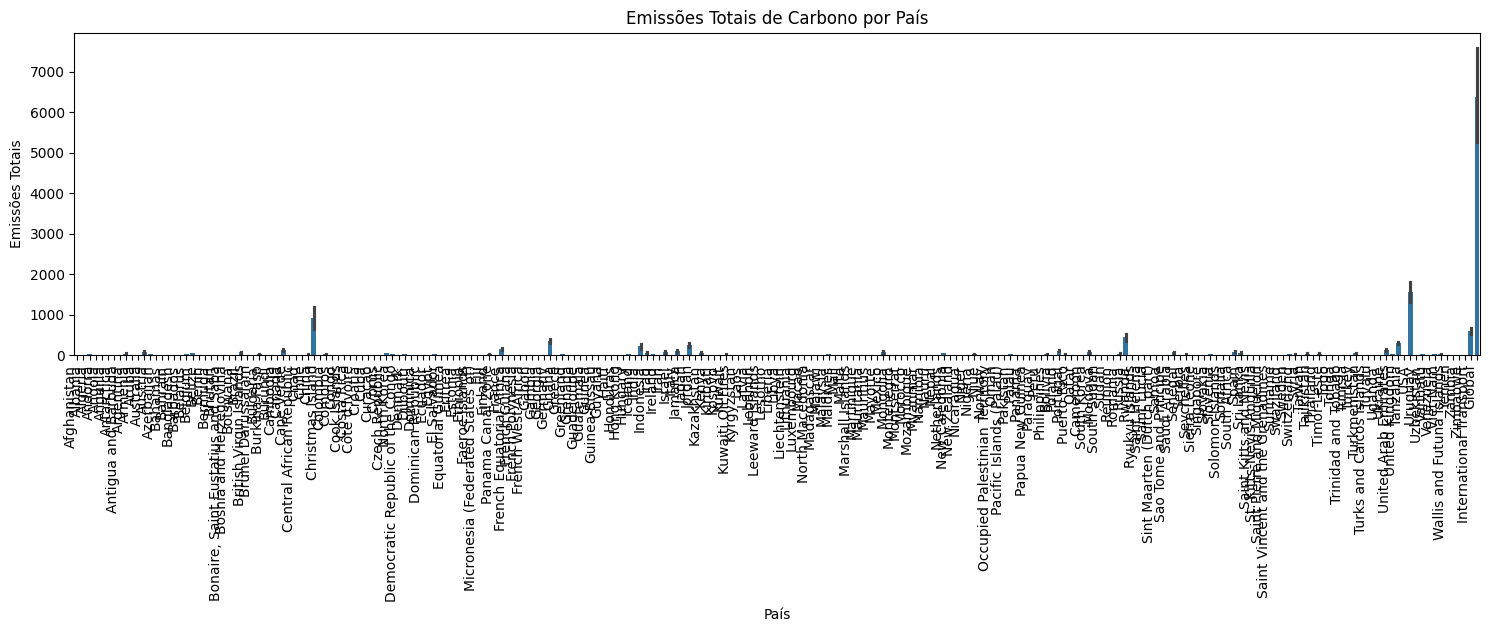

<ipython-input-2-468d7414d2ee>:71: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


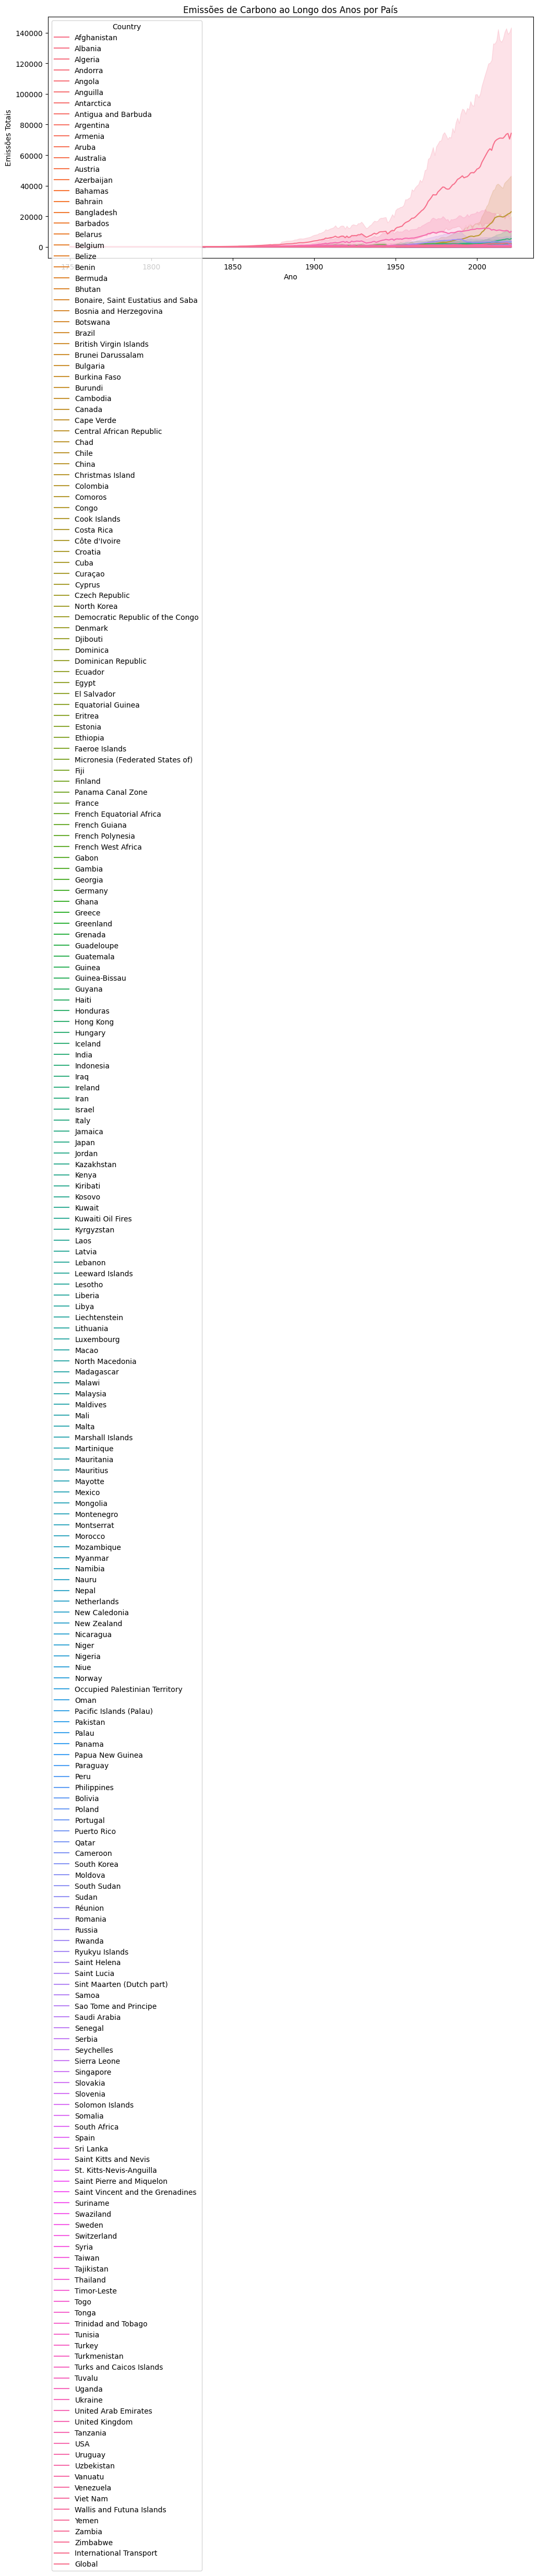

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive')

# Função para carregar e preparar o DataFrame
def load_and_prepare_data(file_name):
    df = pd.read_csv(file_name)
    df_numerico = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Year'], errors='ignore')
    return df_numerico[df_numerico != 0].dropna(), df

# Função para criar gráficos de barras
def create_bar_plot(df):
    plt.figure(figsize=(15, 6))  # Aumentar a largura do gráfico
    sns.barplot(x='Country', y='Total', data=df)
    plt.title('Emissões Totais de Carbono por País')
    plt.xticks(rotation=90, ha='right')  # Rotacionar as etiquetas
    plt.ylabel('Emissões Totais')
    plt.xlabel('País')
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.4)  # Aumentar o espaço na parte inferior
    plt.show()

# Caminho para o arquivo CSV no Google Drive
file_path = '/content/drive/My Drive/Projeto-CDIA.csv'  # Substitua pelo caminho correto se necessário

# Carregar o arquivo
df_numerico, df = load_and_prepare_data(file_path)

# Calcular e exibir medidas
medidas = calculate_statistics(df_numerico)
print("Resumo das Medidas:\n", medidas)

# Criar boxplots para as fontes de emissão
create_boxplots(df_numerico[['Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other']])

# Criar gráfico de barras
create_bar_plot(df)

# Criar gráfico de linha por país
create_line_plot(df)
